Ideia: 
- Se tiver tempo, podemos fazer um streamlit separando em 3 áreas de atuação: Análise de dados, Ciência de dados e Engenharia de Dados. Assim poderia colocar essas três opções em um sidebar e fazer a mesma análise dentro para cada uma delas. Acho que seria algo bem interessante se tivermos tempo
- Por enquanto, fazemos tudo para análise de dados nesse notebook tentando deixar as coisas parametrizadas.

# Configuração inicial

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import plotly as px
import re

In [90]:
pd.set_option('display.max_columns', 500)

# Funções

In [91]:
def get_columns_part(df,parts = []):
    columns = []
    for column in df.columns:
        column_formmatado = column[0]
        if column_formmatado[:2] in parts:
            columns.append(column)
    return columns

def clean_column_names(columns_df):
    try:
        new_names = [col[1] for col in columns_df] 
    except:
        new_names = columns_df
    
    return new_names

def get_columns_question(df,part,question):
    df_part = df[get_columns_part(df,parts = [part])]
    columns = [col for col in df_part.columns if col[0].split('_')[1]== question]
    return columns

def get_question(df,part,question):
    df_question = df[get_columns_question(df,part,question)]
    
    df_question.columns = clean_column_names(df_question.columns)
    
    if len(df_question.columns) > 1:
        level_0_name = df_question.columns[0]
        df_question.columns = pd.MultiIndex.from_product([[level_0_name],df_question.columns])
    
    return df_question

def range_char(start, stop):
    
    return (chr(n) for n in range(ord(start), ord(stop) + 1))

def get_part(df,part):
    cols_part = get_columns_part(df,parts=[part])
    
    min_question = cols_part[1][0].split('_')[1]
    max_question = cols_part[-1][0].split('_')[1]
    
    questions = range_char(min_question,max_question)
    
    df_part = pd.concat([get_question(df,part,question) for question in questions],axis=1)
    return df_part

Configurações gerais do dataframe principal

In [92]:
df_all = pd.read_csv('./datasets/State of Data 2021 - Dataset - Pgina1.csv')
df_all = df_all[df_all["('P1_e_b ', 'Regiao onde mora')"] != 'Exterior'].reset_index(drop=True)
df_all.columns=[col.replace("'s","s") for col in df_all.columns]
df_all.columns=[col.replace("P2_q","P2_p") for col in df_all.columns]
df_all.columns=[col.replace("P2_r","P2_q") for col in df_all.columns]
df_all.columns=[col.replace("P2_s","P2_r") for col in df_all.columns]
df_all.columns = [literal_eval(col) for col in df_all.columns]
df_all.columns = [(col[0].strip(),col[1].strip()) for col in df_all.columns]
df_all.head()

/tmp/ipykernel_21959/519725802.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('./datasets/State of Data 2021 - Dataset - Pgina1.csv')


,"(P0, id)","(P1_a, Idade)","(P1_a_a, Faixa idade)","(P1_b, Genero)","(P1_e, Estado onde mora)","(P1_e_a, uf onde mora)","(P1_e_b, Regiao onde mora)","(P1_g_b, Regiao de origem)","(P1_g_c, Mudou de Estado?)","(P1_h, Nivel de Ensino)","(P1_i, Área de Formação)","(P2_a, Qual sua situação atual de trabalho?)","(P2_b, Setor)","(P2_c, Numero de Funcionarios)","(P2_d, Gestor?)","(P2_e, Cargo como Gestor)","(P2_f, Cargo Atual)","(P2_g, Nivel)","(P2_h, Faixa salarial)","(P2_i, Quanto tempo de experiência na área de dados você tem?)","(P2_j, Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?)","(P2_k, Você está satisfeito na sua empresa atual?)","(P2_l, Qual o principal motivo da sua insatisfação com a empresa atual?)","(P2_l_a, Falta de oportunidade de crescimento no emprego atual)","(P2_l_b, Salário atual não corresponde ao mercado)","(P2_l_c, Não tenho uma boa relação com meu líder/gestor)","(P2_l_d, Gostaria de trabalhar em em outra área de atuação)","(P2_l_e, Gostaria de receber mais benefícios)","(P2_l_f, O clima de trabalho/ambiente não é bom)","(P2_l_g, Falta de maturidade analítica na empresa)","(P2_m, Você participou de entrevistas de emprego nos últimos 6 meses?)","(P2_n, Você pretende mudar de emprego nos próximos 6 meses?)","(P2_o, Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?)","(P2_o_a, Remuneração/Salário)","(P2_o_b, Benefícios)","(P2_o_c, Propósito do trabalho e da empresa)","(P2_o_d, Flexibilidade de trabalho remoto)","(P2_o_e, Ambiente e clima de trabalho)","(P2_o_f, Oportunidade de aprendizado e trabalhar com referências na área)","(P2_o_g, Plano de carreira e oportunidades de crescimento profissional)","(P2_o_h, Maturidade da empresa em termos de tecnologia e dados)","(P2_o_i, Qualidade dos gestores e líderes)","(P2_o_j, Reputação que a empresa tem no mercado)","(P2_p, Atualmente qual a sua forma de trabalho?)","(P2_q, Qual a forma de trabalho ideal para você?)","(P2_r, Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?)","(P3_a, Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?)","(P3_b, Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?)","(P3_b_a, Analytics Engineer)","(P3_b_b, Engenharia de Dados/Data Engineer)","(P3_b_c, Analista de Dados/Data Analyst)","(P3_b_d, Cientista de Dados/Data Scientist)","(P3_b_e, Database Administrator/DBA)","(P3_b_f, Analista de Business Intelligence/BI)","(P3_b_g, Arquiteto de Dados/Data Architect)","(P3_b_h, Data Product Manager/DPM)","(P3_b_i, Business Analyst)","(P3_c, Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?)","(P3_c_a, Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.)","(P3_c_b, Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.)","(P3_c_c, Atração, seleção e contratação de talentos para o time de dados.)","(P3_c_d, Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.)","(P3_c_e, Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.)","(P3_c_f, Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.)","(P3_c_g, Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.)","(P3_c_h, Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.)","(P3_c_i, Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.)","(P3_c_j, Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.)","(P3_c_k, Gestão de pessoas, apoio no desenvolvimen

In [93]:
df_all.shape

(2592, 356)

In [94]:
df_all[('P4_a', 'Atuacao')].unique()

array(['Gestor', 'Engenharia de Dados', 'Ciência de Dados', 'Outra',
       'Análise de Dados', 'Buscando emprego na área de dados.'],
      dtype=object)

# Base de dados e contexto

A base de dados foi obtida a partir do [link](https://www.kaggle.com/datasets/datahackers/state-of-data-2021 'dataset').
Ela consiste numa pesquisa feita para entender o mecado de trabalho na área de dados do Brasil e é dividido em sete partes:

- Parte 1 - Dados demográficos
- Parte 2 - Dados sobre carreira
- Parte 3 - Desafios dos gestores de times de dados
- Parte 4 - Conhecimentos na área de dados
- Parte 5 - Objetivos na área de dados
- Parte 6 - Conhecimentos em Engenharia de Dados/DE
- Parte 7 - Conhecimentos em Análise de Dados/DA
- Parte 8 - Conhecimentos em Ciências de Dados/DS
- Parte 9 - Sobre a comunidade Data Hackers

O objetivo será explorar algumas informações das Partes 1, 2, 4 e 7 e responder as seguintes perguntas:
- <mark style="background-color: #FFFF00">Pergunta 1?</mark>  
- <mark style="background-color: #FFFF00">Pergunta 1?</mark>
- <mark style="background-color: #FFFF00">...</mark>
- <mark style="background-color: #FFFF00">Pergunta n?</mark>

## Lendo dataset para carreira específica

In [95]:
career = 'Análise de Dados'

In [96]:
df = df_all[df_all[('P4_a', 'Atuacao')]==career]
df.head()

,"(P0, id)","(P1_a, Idade)","(P1_a_a, Faixa idade)","(P1_b, Genero)","(P1_e, Estado onde mora)","(P1_e_a, uf onde mora)","(P1_e_b, Regiao onde mora)","(P1_g_b, Regiao de origem)","(P1_g_c, Mudou de Estado?)","(P1_h, Nivel de Ensino)","(P1_i, Área de Formação)","(P2_a, Qual sua situação atual de trabalho?)","(P2_b, Setor)","(P2_c, Numero de Funcionarios)","(P2_d, Gestor?)","(P2_e, Cargo como Gestor)","(P2_f, Cargo Atual)","(P2_g, Nivel)","(P2_h, Faixa salarial)","(P2_i, Quanto tempo de experiência na área de dados você tem?)","(P2_j, Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?)","(P2_k, Você está satisfeito na sua empresa atual?)","(P2_l, Qual o principal motivo da sua insatisfação com a empresa atual?)","(P2_l_a, Falta de oportunidade de crescimento no emprego atual)","(P2_l_b, Salário atual não corresponde ao mercado)","(P2_l_c, Não tenho uma boa relação com meu líder/gestor)","(P2_l_d, Gostaria de trabalhar em em outra área de atuação)","(P2_l_e, Gostaria de receber mais benefícios)","(P2_l_f, O clima de trabalho/ambiente não é bom)","(P2_l_g, Falta de maturidade analítica na empresa)","(P2_m, Você participou de entrevistas de emprego nos últimos 6 meses?)","(P2_n, Você pretende mudar de emprego nos próximos 6 meses?)","(P2_o, Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?)","(P2_o_a, Remuneração/Salário)","(P2_o_b, Benefícios)","(P2_o_c, Propósito do trabalho e da empresa)","(P2_o_d, Flexibilidade de trabalho remoto)","(P2_o_e, Ambiente e clima de trabalho)","(P2_o_f, Oportunidade de aprendizado e trabalhar com referências na área)","(P2_o_g, Plano de carreira e oportunidades de crescimento profissional)","(P2_o_h, Maturidade da empresa em termos de tecnologia e dados)","(P2_o_i, Qualidade dos gestores e líderes)","(P2_o_j, Reputação que a empresa tem no mercado)","(P2_p, Atualmente qual a sua forma de trabalho?)","(P2_q, Qual a forma de trabalho ideal para você?)","(P2_r, Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?)","(P3_a, Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?)","(P3_b, Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?)","(P3_b_a, Analytics Engineer)","(P3_b_b, Engenharia de Dados/Data Engineer)","(P3_b_c, Analista de Dados/Data Analyst)","(P3_b_d, Cientista de Dados/Data Scientist)","(P3_b_e, Database Administrator/DBA)","(P3_b_f, Analista de Business Intelligence/BI)","(P3_b_g, Arquiteto de Dados/Data Architect)","(P3_b_h, Data Product Manager/DPM)","(P3_b_i, Business Analyst)","(P3_c, Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?)","(P3_c_a, Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.)","(P3_c_b, Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.)","(P3_c_c, Atração, seleção e contratação de talentos para o time de dados.)","(P3_c_d, Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.)","(P3_c_e, Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.)","(P3_c_f, Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.)","(P3_c_g, Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.)","(P3_c_h, Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.)","(P3_c_i, Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.)","(P3_c_j, Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.)","(P3_c_k, Gestão de pessoas, apoio no desenvolvimen

In [97]:
df.shape

(838, 356)

## Lendo a Parte 1

A P1 consiste em dados gerais das pessoas que responderam a pesquisa.

### Ideias de perguntas
- Relacionar nível de ensino com salário
    - Normalmente, dizem que ter um mestrado é importante para ciênciad e dados. 
    - Existe uma relação com pós-graduação e atuação em dados?
- Analisar a frequência de área de formação. Colocar em grupos maiores Exatas, Tecnologicas, Humanas, Natureza?
- Idade média dos profissionais
- Um profissional de dados precisa estar disposto a se mudar para trabalhar?

In [98]:
part = 'P1'
df_dem = get_part(df,part)
df_dem.head()

,"(Idade, Idade)","(Idade, Faixa idade)",Genero,"(Estado onde mora, Estado onde mora)","(Estado onde mora, uf onde mora)","(Estado onde mora, Regiao onde mora)","(Regiao de origem, Regiao de origem)","(Regiao de origem, Mudou de Estado?)",Nivel de Ensino,Área de Formação
478,35.0,35-39,Feminino,Minas Gerais (MG),MG,Sudeste,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...
480,30.0,30-34,Feminino,Paraná (PR),PR,Sul,NaN,0,Doutorado ou Phd,Outras Engenharias
484,26.0,25-29,Masculino,São Paulo (SP),SP,Sudeste,Sul,1,Graduação/Bacharelado,Outras Engenharias
487,37.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Economia/ Administração / Contabilidade / Fina...
489,18.0,17-21,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Não tenho graduação formal,NaN


All rows with nan

In [99]:
df_dem[df_dem.isna().any(axis=1)]

,"(Idade, Idade)","(Idade, Faixa idade)",Genero,"(Estado onde mora, Estado onde mora)","(Estado onde mora, uf onde mora)","(Estado onde mora, Regiao onde mora)","(Regiao de origem, Regiao de origem)","(Regiao de origem, Mudou de Estado?)",Nivel de Ensino,Área de Formação
478,35.0,35-39,Feminino,Minas Gerais (MG),MG,Sudeste,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...
480,30.0,30-34,Feminino,Paraná (PR),PR,Sul,NaN,0,Doutorado ou Phd,Outras Engenharias
487,37.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Economia/ Administração / Contabilidade / Fina...
489,18.0,17-21,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Não tenho graduação formal,NaN
490,23.0,22-24,Masculino,São Paulo (SP),SP,Sudeste,NaN,0,Estudante de Graduação,Outras Engenharias
...,...,...,...,...,...,...,...,...,...,...
2564,22.0,22-24,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...
2565,27.0,25-29,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Graduação/Bacharelado,Outras Engenharias
2569,NaN,55+,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Pós-graduação,Estatística/ Matemática / Matemática Computaci...
2579,28.0,25-29,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...


In [100]:
df_dem.columns[1]

('Idade', 'Faixa idade')

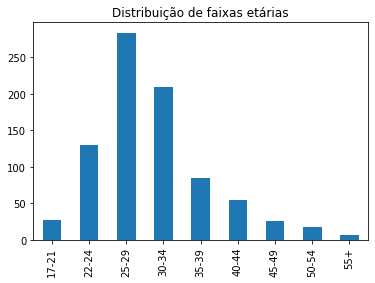

In [101]:
ax = df_dem[('Idade', 'Faixa idade')].value_counts().sort_index().plot(kind='bar',title='Distribuição de faixas etárias',grid=False,subplots=False);


In [102]:
df_dem[("Regiao de origem", "Mudou de Estado?")].sum()

130

In [103]:
df_dem[("Regiao de origem", "Mudou de Estado?")].sum()/len(df_dem)*100

15.513126491646778

In [104]:
df_dem[('Estado onde mora', 'Regiao onde mora')].isnull().sum()


0

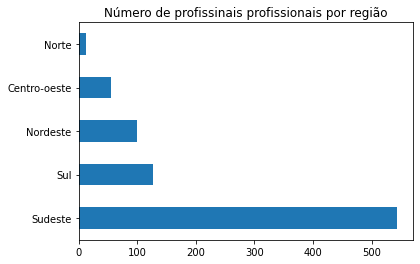

In [106]:
ax = df_dem[('Estado onde mora', 'Regiao onde mora')].value_counts().plot(kind='barh',title='Número de profissinais profissionais por região',grid=False,subplots=False);


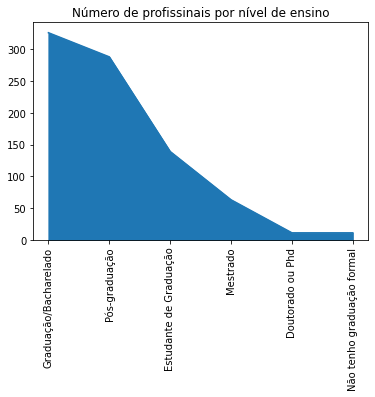

In [131]:
df_dem['Nivel de Ensino'].value_counts().plot(kind='area',title='Número de profissinais por nível de ensino',grid=False,subplots=False);
plt.xticks(rotation=90);


In [117]:
dic_areas = {'Computação / Engenharia de Software / Sistemas de Informação/ TI':'Computação',
       'Outras Engenharias':'Engenharias',
       'Economia/ Administração / Contabilidade / Finanças':'Administração',
       'Marketing / Publicidade / Comunicação / Jornalismo':'Comunicação',
       'Estatística/ Matemática / Matemática Computacional':'Exatas', 
       'Química / Física':'Exatas',
       'Ciências Biológicas/Farmácia/Medicina/Área da Saúde':'Ciências Biológicas'}
df_dem['Área de Formação'] = df_dem['Área de Formação'].apply(lambda x: dic_areas[x] if x in dic_areas else x)
df_dem['Área de Formação'].unique()

array(['Computação', 'Engenharias', 'Administração', nan, 'Outras',
       'Comunicação', 'Exatas', 'Ciências Sociais', 'Ciências Biológicas'],
      dtype=object)

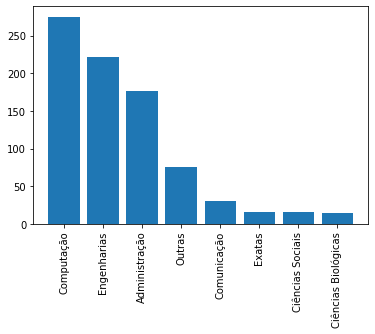

In [130]:
plt.bar(x = df_dem['Área de Formação'].dropna().unique(), height = df_dem['Área de Formação'].value_counts());
plt.xticks(rotation=90);


In [121]:
df_dem['Área de Formação'].value_counts().to_list()

Computação             275
Engenharias            222
Administração          176
Exatas                  76
Comunicação             31
Ciências Sociais        16
Ciências Biológicas     16
Outras                  15
Name: Área de Formação, dtype: int64

In [124]:
df_dem['Área de Formação'].dropna().unique()

array(['Computação', 'Engenharias', 'Administração', 'Outras',
       'Comunicação', 'Exatas', 'Ciências Sociais', 'Ciências Biológicas'],
      dtype=object)

# Lendo a parte 2

In [132]:
part = 'P2'
df_career = get_part(df,part)
df_career.head()

,Setor,Numero de Funcionarios,Gestor?,Cargo como Gestor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,"(Qual o principal motivo da sua insatisfação com a empresa atual?, Qual o principal motivo da sua insatisfação com a empresa atual?)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Falta de oportunidade de crescimento no emprego atual)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Salário atual não corresponde ao mercado)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Não tenho uma boa relação com meu líder/gestor)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Gostaria de trabalhar em em outra área de atuação)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Gostaria de receber mais benefícios)","(Qual o principal motivo da sua insatisfação com a empresa atual?, O clima de trabalho/ambiente não é bom)","(Qual o principal motivo da sua insatisfação com a empresa atual?, Falta de maturidade analítica na empresa)",Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,"(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Remuneração/Salário)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Benefícios)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Propósito do trabalho e da empresa)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Flexibilidade de trabalho remoto)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Ambiente e clima de trabalho)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Oportunidade de aprendizado e trabalhar com referências na área)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Plano de carreira e oportunidades de crescimento profissional)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Maturidade da empresa em termos de tecnologia e dados)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Qualidade dos gestores e líderes)","(Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?, Reputação que a empresa tem no mercado)",Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?
478,Educação,de 1001 a 3000,0.0,NaN,Analista de BI/BI Analyst/Analytics Engineer,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Propósito do trabalho e d...",1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial.
480,Área da Saúde,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst/Analytics Engineer,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de empregos/proc...,Não estou buscando e não pretendo mudar de emp...,"Propósito do trabalho e da empresa,

In [133]:
df_career.shape

(838, 34)

In [138]:
df_career['Faixa salarial'].isnull().sum()

0

In [140]:
df_career['Quanto tempo de experiência na área de dados você tem?'].unique()

array(['de 1 a 2 anos', 'Mais de 10 anos', 'Menos de 1 ano',
       'Não tenho experiência na área de dados', 'de 6 a 10 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos'], dtype=object)

In [154]:
experiencia_converter = {'de 1 a 2 anos':2, 'Mais de 10 anos':6, 'Menos de 1 ano':1,
       'Não tenho experiência na área de dados':0, 'de 6 a 10 anos':5,
       'de 2 a 3 anos':3, 'de 4 a 5 anos':4}
salario_converter = {
    'de R$ 1.001/mês a R$ 2.000/mês': 1500., 
    'de R$ 2.001/mês a R$ 3000/mês': 2500.,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000., 
    'de R$ 6.001/mês a R$ 8.000/mês': 7000.,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500.,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000.,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000.,
    'Menos de R$ 1.000/mês': 1000.,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000.,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500., 
    'Acima de R$ 25.001/mês': 25000.
}
s_y= df_career['Faixa salarial'].map(salario_converter)
s_x = df_career['Quanto tempo de experiência na área de dados você tem?'].map(experiencia_converter)


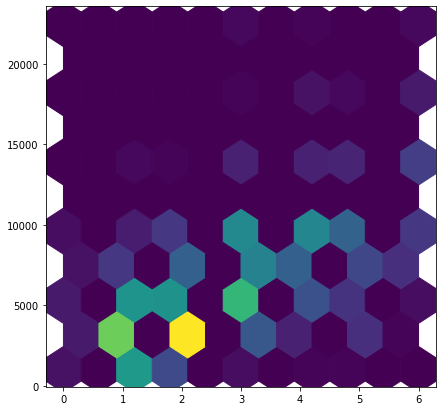

In [161]:
fig, ax = plt.subplots(figsize=(7,7))
ax.hexbin(x=s_x, y=s_y, gridsize=10)

<AxesSubplot:xlabel='Faixa salarial', ylabel='Quanto tempo de experiência na área de dados você tem?'>

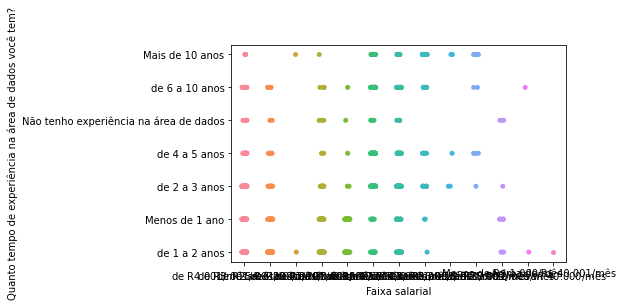

In [141]:
sns.stripplot(data=df_career, x='Faixa salarial',  y='Quanto tempo de experiência na área de dados você tem?');
plt

## Lendo a Parte 4

Consiste em informações sobre atuação e ferramentas/tecnologias utilizadas pelos profissionais na área de dados:

É um total de 9 perguntas em 5 temas:
- Atuação
    - Área
- Fontes de dados:
    - Fontes de dados já analisadas ou processadas
    - Fonte de dados mais utilizada
- Linguagens de programação
    - Linguagens de programação utilizadas no trabalho
    - Linguagem de programação mais utilizada no trabalho
- Bancos de dados
    - Bancos de dados utilizados no trabalho
- Cloud
    - Opções de Cloud utilizadas no trabalho
- BI
    - Ferramentas de BI utilizadas no trabalho

Ideia
- Analisar linguagens de programação mais usadas
- Analisar linguagens que mais agregam valor salarial
- Analisar clouds e sua relação com salário
- Analisar ferramentas de BI e sua relação com salário
- Analisar linguagens de bancos de dados mais comuns (P4_f)
- Existe uma discrepância de tecnologias entre aqueles que estão estudando e aquele que estão empregados? Os estudantes tem trilhado o caminho certo?
- Fazer análises considerando diferentes áreas de atuação

In [78]:
part = 'P4'
df_knowledge = get_part(df,part)
df_knowledge.head()

Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?  \
    Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?   
485  *Análise de Dados/BI:* Extrai e cruza dados un...                                                                                  
487  *Análise de Dados/BI:* Extrai e cruza dados un...                                                                                  
491  *Análise de Dados/BI:* Extrai e cruza dados un...                                                                                  
494  *Análise de Dados/BI:* Extrai e cruza dados un...                                                                                  
496  *Análise de Dados/BI:* Extrai e cruza dados un...                                                                                  

                       \
              Atuacao   
485  Análise de Dados   
487  Análise de Dados   
491  Análise de Dados   
494  Análise de Dados   
496  Análise de Dados   

    Quais das fontes de dados listadas você já analisou ou processou no trabalho?  \
    Quais das fontes de dados listadas você já analisou ou processou no trabalho?   
485     Dados relacionais (estruturados em bancos SQL)                              
487  Dados relacionais (estruturados em bancos SQL)...                              
491                                          Planilhas                              
494  Dados relacionais (estruturados em bancos SQL)...                              
496  Dados relacionais (estruturados em bancos SQL)...                              

                                                    \
    Dados relacionais (estruturados em bancos SQL)   
485                                            1.0   
487                                            1.0   
491                                            0.0   
494                                            1.0   
496                                            1.0   

                                                                               \
    Dados armazenados em bancos NoSQL Imagens Textos/Documentos Vídeos Áudios   
485                               0.0     0.0               0.0    0.0    0.0   
487                               1.0     0.0               1.0    0.0    0.0   
491                               0.0     0.0               0.0    0.0    0.0   
494                               0.0     1.0               1.0    0.0    0.0   
496                               0.0     0.0               0.0    0.0    0.0   

                                      \
    Planilhas Dados georeferenciados   
485       0.0                    0.0   
487       1.0                    0.0   
491       1.0                    0.0   
494       1.0                    1.0   
496       1.0                    0.0   

    Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?  \
    Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?   
485  Dados relacionais (estruturados em bancos SQL)...                               
487  Dados relacionais (estruturados em bancos SQL)...                               
491                                          Planilhas                               
494  Dados relacionais (estruturados em bancos SQL)...                               
496  Dados relacionais (estruturados em bancos SQL)...                               

                                                    \
    Dados relacionais (estruturados em bancos SQL)   
485                                            1.0   
487                                            1.0   
491                                            0.0   
494                                            1.0   
496                                            1.0   

                                                              

In [12]:
df_knowledge = df_knowledge[df_knowledge.columns[1:]]
df_knowledge.head()

Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?  \
                                                                                                                              Atuacao   
485                                   Análise de Dados                                                                                  
487                                   Análise de Dados                                                                                  
491                                   Análise de Dados                                                                                  
494                                   Análise de Dados                                                                                  
496                                   Análise de Dados                                                                                  

    Quais das fontes de dados listadas você já analisou ou processou no trabalho?  \
    Quais das fontes de dados listadas você já analisou ou processou no trabalho?   
485     Dados relacionais (estruturados em bancos SQL)                              
487  Dados relacionais (estruturados em bancos SQL)...                              
491                                          Planilhas                              
494  Dados relacionais (estruturados em bancos SQL)...                              
496  Dados relacionais (estruturados em bancos SQL)...                              

                                                    \
    Dados relacionais (estruturados em bancos SQL)   
485                                            1.0   
487                                            1.0   
491                                            0.0   
494                                            1.0   
496                                            1.0   

                                                                               \
    Dados armazenados em bancos NoSQL Imagens Textos/Documentos Vídeos Áudios   
485                               0.0     0.0               0.0    0.0    0.0   
487                               1.0     0.0               1.0    0.0    0.0   
491                               0.0     0.0               0.0    0.0    0.0   
494                               0.0     1.0               1.0    0.0    0.0   
496                               0.0     0.0               0.0    0.0    0.0   

                                      \
    Planilhas Dados georeferenciados   
485       0.0                    0.0   
487       1.0                    0.0   
491       1.0                    0.0   
494       1.0                    1.0   
496       1.0                    0.0   

    Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?  \
    Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?   
485  Dados relacionais (estruturados em bancos SQL)...                               
487  Dados relacionais (estruturados em bancos SQL)...                               
491                                          Planilhas                               
494  Dados relacionais (estruturados em bancos SQL)...                               
496  Dados relacionais (estruturados em bancos SQL)...                               

                                                    \
    Dados relacionais (estruturados em bancos SQL)   
485                                            1.0   
487                                            1.0   
491                                            0.0   
494                                            1.0   
496                                            1.0   

                                                                               \
    Dados armazenados em bancos NoSQL Imagens Textos/Documentos Vídeos Áudios   
485                               0.0     0.0               0.0    0.0    0.

In [14]:
df_knowledge.shape

(849, 116)

In [15]:
df_knowledge[df_knowledge.isna().any(axis=1)]

Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?  \
                                                                                                                               Atuacao   
619                                    Análise de Dados                                                                                  
806                                    Análise de Dados                                                                                  
1809                                   Análise de Dados                                                                                  

     Quais das fontes de dados listadas você já analisou ou processou no trabalho?  \
     Quais das fontes de dados listadas você já analisou ou processou no trabalho?   
619   Dados relacionais (estruturados em bancos SQL)...                              
806                                           Planilhas                              
1809  Dados relacionais (estruturados em bancos SQL)...                              

                                                     \
     Dados relacionais (estruturados em bancos SQL)   
619                                             1.0   
806                                             0.0   
1809                                            1.0   

                                                                         \
     Dados armazenados em bancos NoSQL Imagens Textos/Documentos Vídeos   
619                                0.0     0.0               0.0    0.0   
806                                0.0     0.0               0.0    0.0   
1809                               0.0     0.0               0.0    0.0   

                                              \
     Áudios Planilhas Dados georeferenciados   
619     0.0       1.0                    0.0   
806     0.0       1.0                    0.0   
1809    0.0       1.0                    0.0   

     Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?  \
     Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?   
619   Dados relacionais (estruturados em bancos SQL)...                               
806                                                 NaN                               
1809                                                NaN                               

                                                     \
     Dados relacionais (estruturados em bancos SQL)   
619                                             1.0   
806                                             NaN   
1809                                            NaN   

                                                                         \
     Dados armazenados em bancos NoSQL Imagens Textos/Documentos Vídeos   
619                                0.0     0.0               0.0    0.0   
806                                NaN     NaN               NaN    NaN   
1809                               NaN     NaN               NaN    NaN   

                                              \
     Áudios Planilhas Dados georeferenciados   
619     0.0       1.0                    0.0   
806     NaN       NaN                    NaN   
1809    NaN       NaN                    NaN   

     Quais das linguagens listadas abaixo você utiliza no trabalho?            \
     Quais das linguagens listadas abaixo você utiliza no trabalho?  SQL    R   
619                                              SQL, R              1.0  1.0   
806                                              Python              0.0  0.0   
1809        Não utilizo nenhuma das linguagens listadas              0.0  0.0   

                                                                              \
     Python C/C++/C# .NET Java Julia SAS/Stata Visual Basic/VBA Scala Matlab   
619     0.0      0.0  0.0  0.0   0.0       0.0              0.0   0.0    0.0   
806     1.0    

In [16]:
#dropping lines with nan
df_knowledge.dropna(axis=0,inplace=True)
df_knowledge.shape

(846, 116)

## Lendo a parte 7

In [18]:
part = 'P7'
df_skills = get_part(df,part)
df_skills.head()

Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?  \
    Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?   
485  Realizo construções de dashboards em ferrament...                                          
487  Processo e analiso dados utilizando linguagens...                                          
491  Realizo construções de dashboards em ferrament...                                          
494  Realizo construções de dashboards em ferrament...                                          
496  Processo e analiso dados utilizando linguagens...                                          

                                                                                       \
    Processo e analiso dados utilizando linguagens de programação como Python, R etc.   
485                                                0.0                                  
487                                                1.0                                  
491                                                0.0                                  
494                                                0.0                                  
496                                                1.0                                  

                                                                                                     \
    Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.   
485                                                1.0                                                
487                                                1.0                                                
491                                                1.0                                                
494                                                1.0                                                
496                                                1.0                                                

                                                                     \
    Utilizo APIs para extrair dados e complementar minhas análises.   
485                                                0.0                
487                                                0.0                
491                                                0.0                
494                                                1.0                
496                                                1.0                

                                                                                                                           \
    Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.   
485                                                0.0                                                                      
487                                                0.0                                                                      
491                                                0.0                                                                      
494                                                0.0                                                                      
496                                                1.0                                                                      

                                                                                                                \
    Desenvolvo/cuido da manutenção de ETLs utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.   
485                                                0.0                                                           
487                                                0.0                                                           
491                                                0.0                                                           
494                               

In [19]:
df_skills.shape

(849, 43)

In [20]:
df_skills[df_skills.isna().any(axis=1)]

Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?  \
    Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?   
802  Processo e analiso dados utilizando linguagens...                                          

                                                                                       \
    Processo e analiso dados utilizando linguagens de programação como Python, R etc.   
802                                                1.0                                  

                                                                                                     \
    Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.   
802                                                0.0                                                

                                                                     \
    Utilizo APIs para extrair dados e complementar minhas análises.   
802                                                0.0                

                                                                                                                           \
    Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.   
802                                                1.0                                                                      

                                                                                                                \
    Desenvolvo/cuido da manutenção de ETLs utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.   
802                                                0.0                                                           

                                                                                                               \
    Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.   
802                                                0.0                                                          

                                                                                   \
    Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.   
802                                                0.0                              

                                                           \
    Utilizo ferramentas avançadas de estatística como SAS   
802                                                0.0      

    Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?  \
    Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?   
802                                                NaN                                        

                                                                          \
    Scripts Python SQL & Stored Procedures Apache Airflow Luigi AWS Glue   
802            NaN                     NaN            NaN   NaN      NaN   

                                                                   \
    Talend Stitch Fivetran Google Dataflow Oracle Data Integrator   
802    NaN    NaN      NaN             NaN                    NaN   

                                                                     \
    IBM DataStage SAP BW ETL SQL Server Integration Services (SSIS)   
802           NaN        NaN                                    NaN   

                                                                          \
    SAS Data Integration Qlik Sense Knime Não utilizo ferramentas de ETL   
802                  NaN        NaN   NaN                            NaN   

    Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?  \
    Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio? 

In [21]:
#dropping lines with nan
df_skills.dropna(axis=0,inplace=True)
df_skills.shape

(848, 43)